# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&apikey={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #print(city_url)
        city_weather = requests.get(city_url).json()
        #print(json.dumps(city_weather, indent=4))
        #break
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #break          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | glace bay
Processing Record 3 of Set 1 | turpan
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | wenchang
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | gole
Processing Record 8 of Set 1 | nagqu
Processing Record 9 of Set 1 | ceeldheer
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | qaisumah
Processing Record 12 of Set 1 | chania
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | aquidauana
Processing Record 15 of Set 1 | ahau
City not found. Skipping...
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | ambon
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | jinghong
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | nova sintra
Processing Record 22 of Set 1 | puerto natales
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,19.45,51,77,6.26,NZ,1697152144
1,glace bay,46.1969,-59.9570,13.83,97,100,3.13,CA,1697152144
2,turpan,42.9333,89.1667,19.54,23,0,1.10,CN,1697152145
3,marsh harbour,26.5412,-77.0636,28.86,82,100,7.13,BS,1697151912
4,wenchang,30.9040,118.4887,17.61,87,100,0.17,CN,1697152145


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data2/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data2/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,19.45,51,77,6.26,NZ,1697152144
1,glace bay,46.1969,-59.9570,13.83,97,100,3.13,CA,1697152144
2,turpan,42.9333,89.1667,19.54,23,0,1.10,CN,1697152145
3,marsh harbour,26.5412,-77.0636,28.86,82,100,7.13,BS,1697151912
4,wenchang,30.9040,118.4887,17.61,87,100,0.17,CN,1697152145


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

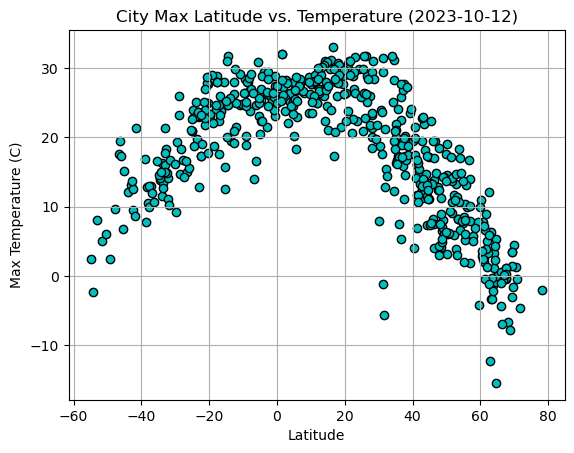

In [8]:
# Build scatter plot for latitude vs. temperature
lat_col = city_data_df["Lat"]
temp_col = city_data_df["Max Temp"]
plt.scatter(lat_col, temp_col, c="c", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data2/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

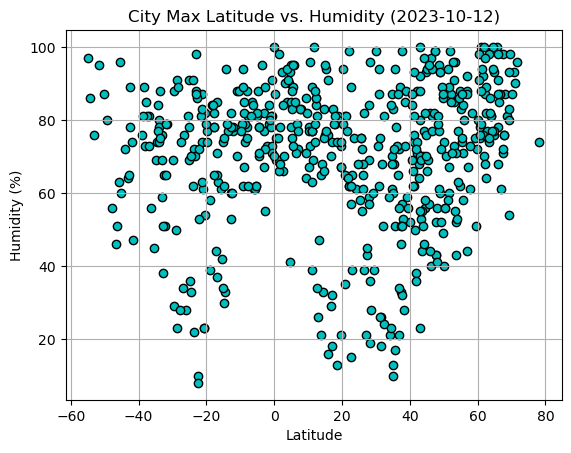

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_col = city_data_df["Lat"]
humid_col = city_data_df["Humidity"]
plt.scatter(lat_col, humid_col, c="c", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data2/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

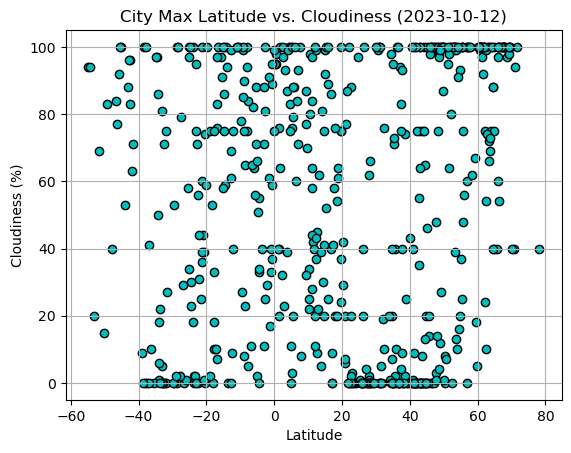

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_col = city_data_df["Lat"]
cloud_col = city_data_df["Cloudiness"]
plt.scatter(lat_col, cloud_col, c="c", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data2/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

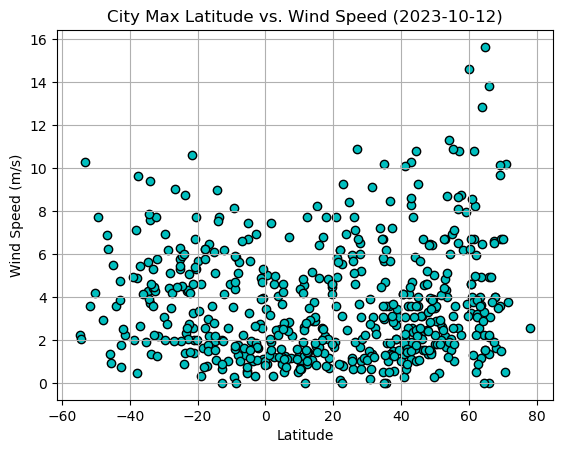

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_col = city_data_df["Lat"]
wind_col = city_data_df["Wind Speed"]
plt.scatter(lat_col, wind_col, c="c", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-10-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data2/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_regress(df, col1, col2):
    x = df[col1]
    y = df[col2]
    plt.scatter(x, y, c="y")
    plt.xlabel(col1)
    plt.ylabel(col2)
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress_values = slope*x + intercept
    plt.plot(x, regress_values, c="r")
    plt.annotate(f"y = {round(slope, 2)} + {round(intercept, 2)}", xy = (0.16, 0.12), xycoords="axes fraction", c="black", size=14)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,glace bay,46.1969,-59.9570,13.83,97,100,3.13,CA,1697152144
2,turpan,42.9333,89.1667,19.54,23,0,1.10,CN,1697152145
3,marsh harbour,26.5412,-77.0636,28.86,82,100,7.13,BS,1697151912
4,wenchang,30.9040,118.4887,17.61,87,100,0.17,CN,1697152145
5,sitka,57.0531,-135.3300,13.94,67,100,10.80,US,1697152020


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,19.45,51,77,6.26,NZ,1697152144
13,aquidauana,-20.4711,-55.7872,27.69,54,74,5.29,BR,1697152073
14,geraldton,-28.7667,114.6000,23.23,23,100,6.17,AU,1697152069
15,ambon,-3.6954,128.1814,29.37,95,40,1.03,ID,1697152148
20,puerto natales,-51.7236,-72.4875,4.99,95,69,3.57,CL,1697151992


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8598961791033459


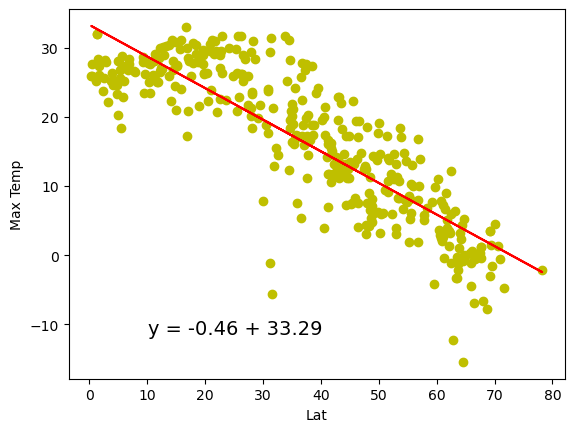

In [15]:
# Linear regression on Northern Hemisphere
plot_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7903932112324507


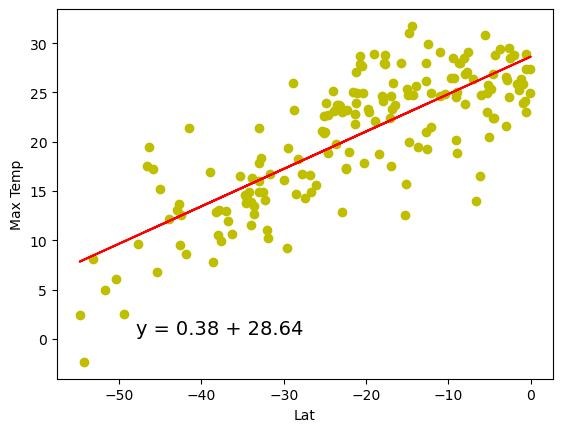

In [16]:
# Linear regression on Southern Hemisphere
plot_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** The northern hemisphere has a strong negative correlation between temperature and latitude.
The southern hemisphere has a strong positive correlation between temperature and latitude.
Another way to say this is temperatures increase as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13707346983778018


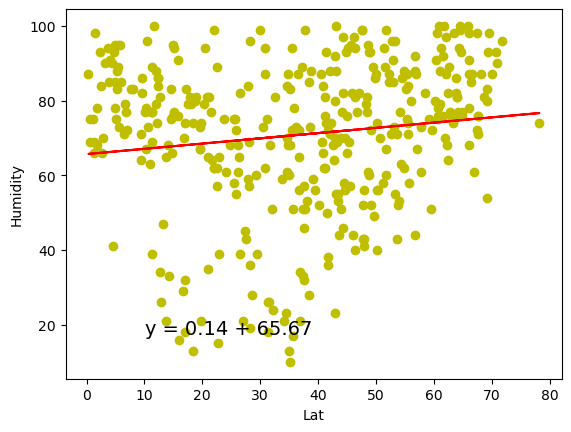

In [17]:
# Northern Hemisphere
plot_regress(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.08541340924533743


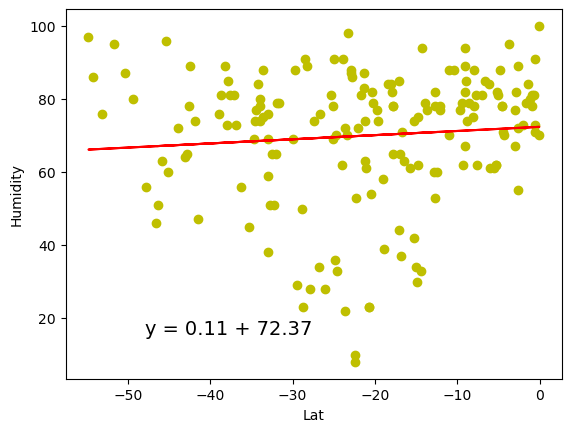

In [18]:
# Southern Hemisphere
plot_regress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** Both hemispheres have a weak positive correlation between Latitude and Humidity. This means that latitude does not affect humidity that much.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20417851312663787


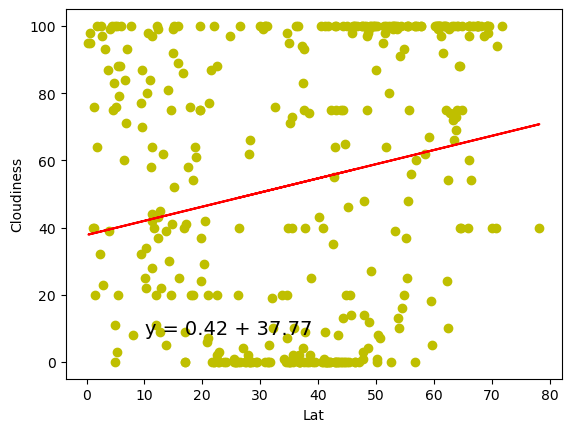

In [19]:
# Northern Hemisphere
plot_regress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.08298303917626905


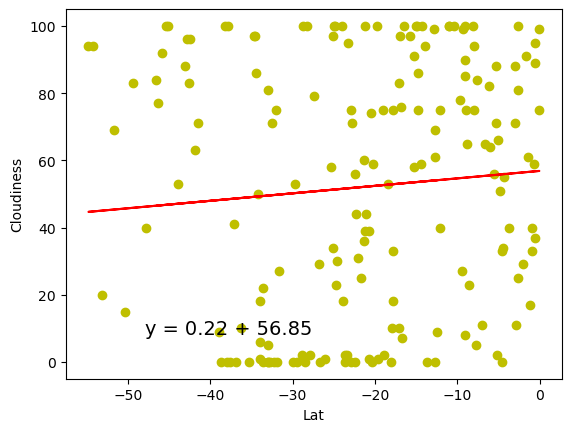

In [20]:
# Southern Hemisphere
plot_regress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** Both hemispheres have a weak positive correlation between Latitude and Cloudiness. This means that latitude does not affect cloudiness that much.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2497240635776776


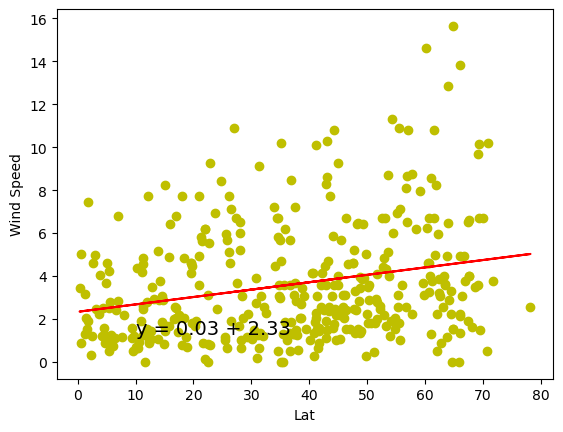

In [21]:
# Northern Hemisphere
plot_regress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.20947648020360224


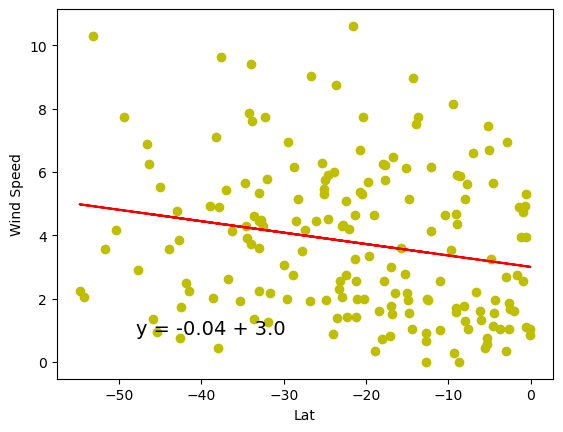

In [22]:
# Southern Hemisphere
plot_regress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** The northern hemisphere has a weak-to-moderate positive correlation between temperature and wind speed. The southern hemisphere has a weak negative correlation between temperature and wind speed. Another way to say this is wind speeds slightly decrease as you get closer to the equator.